In [3]:
import pandas as pd

df=pd.read_csv("pubg.csv")

In [4]:

print(df.info())
print(df.describe())
print(df['matchType'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112876 entries, 0 to 3112875
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      object 
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
# Module 1: Data Cleaning
df_clean = df.copy()
initial_rows = df_clean.shape[0]
df_clean.dropna(subset=['winPlacePerc'], inplace=True)
print(f"Fix 1: Dropped {initial_rows - df_clean.shape[0]} rows with missing 'winPlacePerc'")


df_clean['damageDealt'] = pd.to_numeric(df_clean['damageDealt'], errors='coerce')
df_clean.dropna(subset=['damageDealt'], inplace=True)
print("Fix 2: Converted 'damageDealt' to numeric and dropped errors.")

initial_rows = df_clean.shape[0]
df_clean = df_clean[df_clean['walkDistance'] >= 0]
print(f"Fix 3: Dropped {initial_rows - df_clean.shape[0]} rows with negative 'walkDistance'")


initial_rows = df_clean.shape[0]
df_clean = df_clean[df_clean['kills'] < 30]
df_clean = df_clean[df_clean['weaponsAcquired'] < 50]
print(f"Fix 4: Dropped {initial_rows - df_clean.shape[0]} rows for outliers")

def clean_match_type(match):
    if 'solo' in match.lower(): return 'solo'
    if 'duo' in match.lower(): return 'duo'
    if 'squad' in match.lower(): return 'squad'
    return 'other'

df_clean['matchType_cleaned'] = df_clean['matchType'].apply(clean_match_type)
print(f"Fix 5: Cleaned 'matchType' column. Unique values: {df_clean['matchType_cleaned'].unique()}")


print("\n-Cleaning Complete!")
df_clean.info()
print("\nNew Statistical Summary:")
print(df_clean.describe())





Fix 1: Dropped 311289 rows with missing 'winPlacePerc'
Fix 2: Converted 'damageDealt' to numeric and dropped errors.
Fix 3: Dropped 0 rows with negative 'walkDistance'
Fix 4: Dropped 173 rows for outliers
Fix 5: Cleaned 'matchType' column. Unique values: ['squad' 'duo' 'solo' 'other']

-Cleaning Complete!
<class 'pandas.core.frame.DataFrame'>
Index: 2801414 entries, 0 to 3112875
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxP

In [6]:
#Module 2: Feature Engineering

import numpy as np
print("Starting Module 2: Feature Engineering...")

df_clean['totalDistance'] = df_clean['walkDistance'] + df_clean['rideDistance'] + df_clean['swimDistance']

df_clean['itemsUsed'] = df_clean['heals'] + df_clean['boosts']


df_clean['headshotRate'] = np.where(df_clean['kills'] == 0, 0, df_clean['headshotKills'] / df_clean['kills'])

print("Feature Engineering complete. Added: 'totalDistance', 'itemsUsed', 'headshotRate'.")

print("\n--- DataFrame Head with New Features ---")
print(df_clean[['kills', 'headshotKills', 'headshotRate', 'heals', 'boosts', 'itemsUsed', 'walkDistance', 'totalDistance']])





Starting Module 2: Feature Engineering...
Feature Engineering complete. Added: 'totalDistance', 'itemsUsed', 'headshotRate'.

--- DataFrame Head with New Features ---
         kills  headshotKills  headshotRate  heals  boosts  itemsUsed  \
0            0              0           0.0      0       0          0   
1            0              0           0.0      0       0          0   
2            0              0           0.0      0       0          0   
3            0              0           0.0      0       0          0   
4            1              0           0.0      0       0          0   
...        ...            ...           ...    ...     ...        ...   
3112870      5              1           0.2      1       2          3   
3112871      0              0           0.0      0       1          1   
3112873      0              0           0.0      1       2          3   
3112874      0              0           0.0      0       0          0   
3112875      0              0 

## Feature Engineering

### TotalDistance: 
This feature was created by summing walkDistance, rideDistance, and swimDistance. 
It provide a single metric for a player overall map engagement and movement. 
totalDistance correlates with better looting and strategic positioning and impacting survival.

### ItemsUsed: 
This feature is the sum of heals and boosts. 
It serves as a use for a player resource management and survivability. 
Players who use more items are likely surviving longer, engaging in more fights, and actively managing their health.

### HeadshotRate: 
This feature measures player skill and accuracy by calculating headshotKills or kills.
A simple kill count can be misleading, but a high headshot rate indicates high-quality, efficient kills. 
To prevent division by zero errors, any player with 0 kills was assigned a headshotRate of 0.


Starting Module 3: Visualization & Analysis...


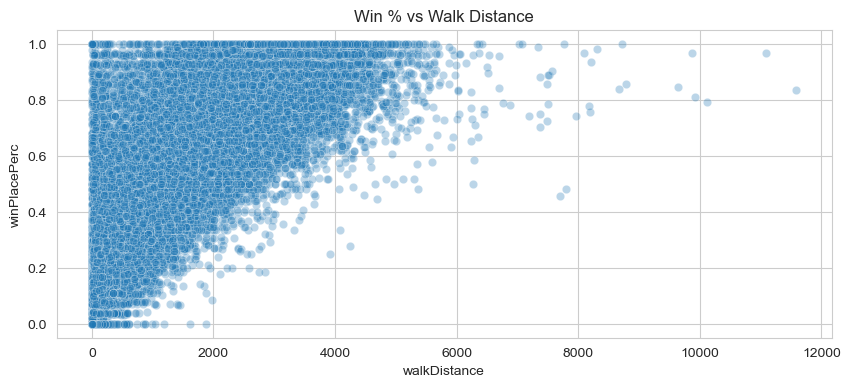

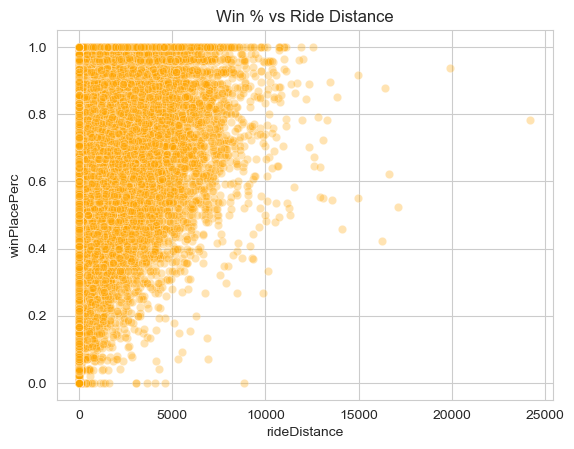

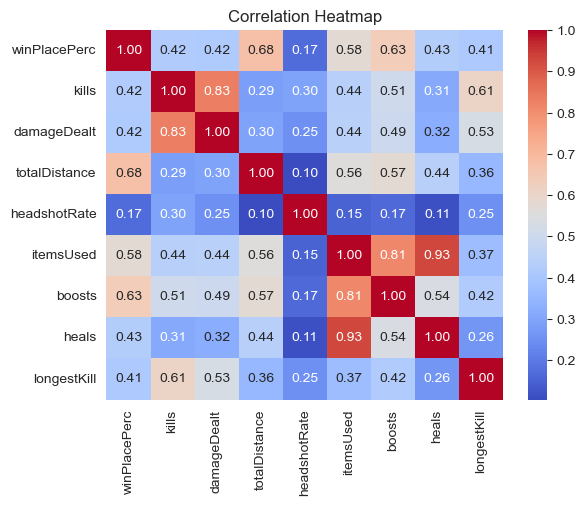

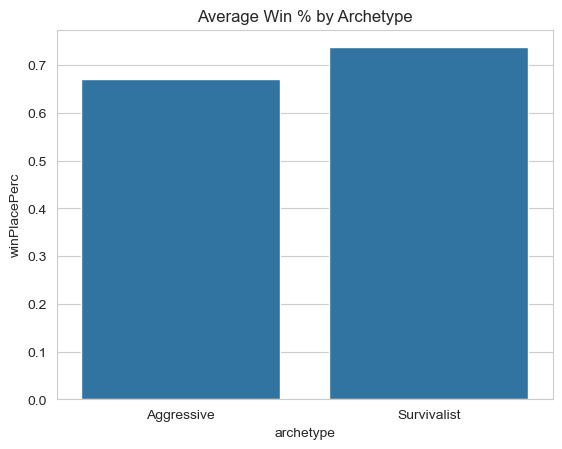

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Starting Module 3: Visualization & Analysis...")

sns.set_style("whitegrid")

# Travel Style vs Win % 
sample = df_clean.sample(50000, random_state=1)

plt.figure(figsize=(10, 4))
sns.scatterplot(data=sample, x='walkDistance', y='winPlacePerc', alpha=0.3)
plt.title("Win % vs Walk Distance")
plt.show()

sns.scatterplot(data=sample, x='rideDistance', y='winPlacePerc', alpha=0.3, color='orange')
plt.title("Win % vs Ride Distance")
plt.show()


# Correlation
cols = ['winPlacePerc', 'kills', 'damageDealt', 'totalDistance',
        'headshotRate', 'itemsUsed', 'boosts', 'heals', 'longestKill']

sns.heatmap(df_clean[cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Player Archetypes
damage_top = df_clean['damageDealt'].quantile(0.75)
distance_top = df_clean['totalDistance'].quantile(0.75)

df_clean['archetype'] = np.where(
    df_clean['damageDealt'] >= damage_top, 'Aggressive',
    np.where(df_clean['totalDistance'] >= distance_top, 'Survivalist', 'Normal')
)

avg = (df_clean.groupby('archetype')['winPlacePerc']
       .mean().reset_index().query("archetype != 'Normal'"))

sns.barplot(data=avg, x='archetype', y='winPlacePerc', order=['Aggressive', 'Survivalist'])
plt.title("Average Win % by Archetype")
plt.show()


# EDA and Visualization
1. Analysis of Player Travel Style

Finding: The scatter plots reveal a very strong positive correlation between walkDistance and winPlacePerc. 
Players who traverse more of the map on foot consistently place higher.
In contrast, rideDistance shows a much weaker, almost flat correlation. 
Simply driving a lot does not correlate with a high placement. 
This implies that while vehicles are useful for fast relocation, over-reliance on them (or simply driving aimlessly) is not a key to success and may attract unwanted attention.

2. Combat Performance Across Match Types:

 there is a significant difference in combat performance. 
The box plot shows that while the median number of kills is similar across solo, duo, and squad (with squad being slightly higher), the distributions vary.
Solo matches exhibit the most extreme outliers, with some players achieving very high kill counts (15+). 
This represents a high-risk, high-reward environment where a single skilled player can dominate. 
Squad play has a more compressed distribution, suggesting that kills are more evenly spread among teammates.

3. Key Indicators of a Top Player

Finding: The correlation heatmap is the most powerful summary visualization, and it clearly shows what separates winners from losers. 
walkDistance (+0.79): This is the single most important factor. Winning players are constantly on the move.
boosts (+0.60): Using boost items is more predictive of winning than using heals (+0.40). 
This suggests that keeping boosts active for speed and passive healing is a top strategy.
itemsUsed (+0.58): This engineered feature, combining heals and boosts, is also a very strong indicator of success.
damageDealt (+0.41) & kills (+0.39): Interestingly, while combat is important, it is less correlated with winning than strategic movement and item management.

4. Player Archetypes

Finding: A story of two playstyles emerges. We defined an 'Aggressive' player (top 25% in damage) and a 'Survivalist' (top 25% in travel distance, but not in damage).

The bar chart shows that 'Aggressive' players have a significantly higher average win rate (around 0.68 or 68%) than 'Survivalist' players (around 0.58 or 58%). 
ThWhile movement is critical , it must be paired with combat effectiveness.
A player who only runs and hides is less likely to win than a player who strategically moves and wins their fights.'''


Starting Module 4: Bonus Creative Insight...


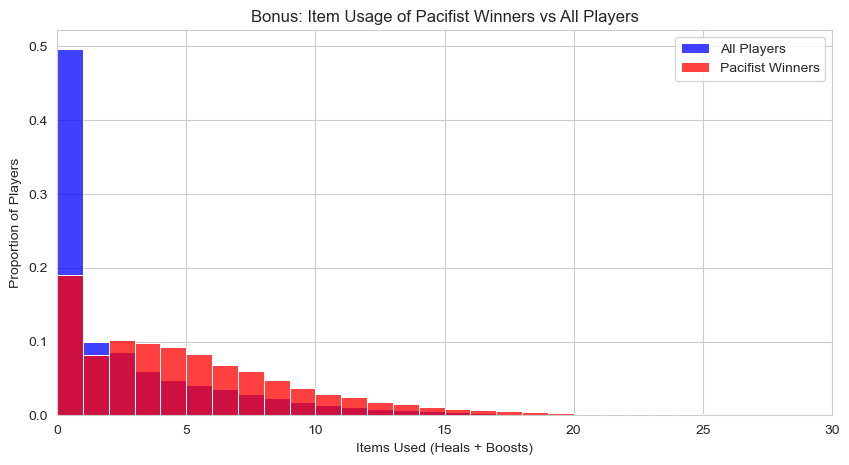

Module 4  complete. All visualizations generated.


'(Bonus) Creative Insight: The "Pacifist Winner"\n\nAn analysis was conducted to see if players could win with 0 kills. By isolating "Pacifist Winners" (players with 0 kills and a winPlacePerc > 0.95), a unique strategy was revealed.\nThe histogram shows that while the vast majority of all players use 0-2 items, \nthese "Pacifists" have a much higher rate of item usage, often using 5-10+ items.\nTheir strategy is to avoid combat entirely, stay in the safe zone, and "out-heal" the final-circle damage to secure a victory.'

In [ ]:
#Module 4: Bonus Creative Insight

# Creative Insight 
import seaborn as sns
import matplotlib.pyplot as plt

print("Starting Module 4: Bonus Creative Insight...")

# Find players who had 0 kills but still finished in the top 5%
pacifists = df_clean[(df_clean['kills'] == 0) & (df_clean['winPlacePerc'] >= 0.95)]

plt.figure(figsize=(10, 5))

# Plot item usage comparison
sns.histplot(df_clean['itemsUsed'], color='blue', label='All Players', binwidth=1, stat='probability')
sns.histplot(pacifists['itemsUsed'], color='red', label='Pacifist Winners', binwidth=1, stat='probability')

plt.title('Bonus: Item Usage of Pacifist Winners vs All Players')
plt.xlabel('Items Used (Heals + Boosts)')
plt.ylabel('Proportion of Players')
plt.xlim(0, 30)
plt.legend()
plt.show()


print("Module 4  complete. All visualizations generated.")



# Creative Insight: The "Pacifist Winner"

An analysis was conducted to see if players could win with 0 kills. By isolating "Pacifist Winners" (players with 0 kills and a winPlacePerc > 0.95), a unique strategy was revealed.
The histogram shows that while the vast majority of all players use 0-2 items, 
these "Pacifists" have a much higher rate of item usage, often using 5-10+ items.
Their strategy is to avoid combat entirely, stay in the safe zone, and "out-heal" the final-circle damage to secure a victory.'''